In [1]:
import pandas as pd
import numpy as np
import csv


In [108]:
L24_total_df = pd.read_csv('csv_raw/ER_L24_t1.csv')
L24_total_df.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,NM_017847,112.294090,-0.662837,0.273813,-2.420767,0.015488,0.120137
1,NM_001003803,182.333378,-0.132781,0.224270,-0.592060,0.553811,0.801922
2,NM_001003800,354.785989,0.072009,0.368656,0.195327,0.845137,0.946766
3,NM_016649,208.700788,-0.619136,0.286961,-2.157560,0.030962,0.178877
4,NM_016647,148.352948,0.746495,0.615334,1.213155,0.225071,0.518246


In [109]:
L24_total_filtered = L24_total_df[L24_total_df['padj'] < 0.05]
len(L24_total_filtered)

578

In [110]:
L24_total_filtered = L24_total_filtered.sort_values(by=['log2FoldChange'])
topNum=sum((L24_total_filtered['log2FoldChange']>1)*1)
botNum=sum((L24_total_filtered['log2FoldChange']<-1)*1)
L24_total_filtered.tail()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4518,NM_019554,2782.601937,1.493255,0.381964,3.909413,9.252073e-05,4.351943e-03
2679,NM_004074,715.242051,1.584397,0.245659,6.449588,1.121548e-10,2.240292e-07
689,NM_000992,359.205401,1.593513,0.336520,4.735269,2.187652e-06,3.972577e-04
4546,NM_033625,148.300167,1.625403,0.517227,3.142532,1.674935e-03,3.020933e-02
3978,NM_005694,54.781701,1.697012,0.353176,4.805007,1.547461e-06,3.253740e-04


In [111]:
topNum

40

In [112]:
botNum

0

#### The interested Genes

In [113]:
topGenes = L24_total_filtered['Unnamed: 0'].tail(topNum)
botGenes = L24_total_filtered['Unnamed: 0'].head(topNum)
notTopGenes = L24_total_filtered['Unnamed: 0'].head(len(L24_total_filtered)-topNum)

#### Now get vals from TE t2 vs t1

In [114]:
TE_1_0 = pd.read_csv('csv_raw/TE_t2_t1.csv')

In [115]:
topTE = TE_1_0[TE_1_0['Unnamed: 0'].isin(topGenes)]
botTE = TE_1_0[TE_1_0['Unnamed: 0'].isin(botGenes)]
notTopTE = TE_1_0[TE_1_0['Unnamed: 0'].isin(notTopGenes)]
len(topTE)

40

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'L24 enriched genes vs others')

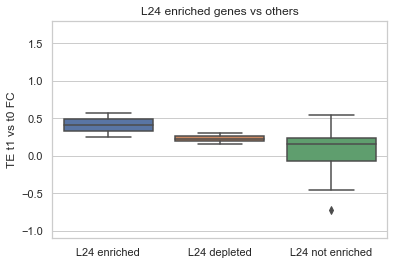

In [106]:
data = {'L24 enriched':topTE['log2FoldChange'], 'L24 depleted':botTE['log2FoldChange'], 'L24 not enriched':notTopTE['log2FoldChange']}
df =  pd.DataFrame(data) 
sns.set(style="whitegrid")
ax=sns.boxplot(data=df)
axes = plt.gca()
axes.set_ylim([-1.1,1.8])
plt.ylabel('TE t1 vs t0 FC')
plt.title('L24 enriched genes vs others')
#plt.savefig('T1 ER on TE t2t1/L24 t0 enriched genes on TE boxplot.png',dpi=300)

/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:238: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  maj_on = any(t.tick1On for t in ax_i.yaxis.majorTicks)
/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:239: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  min_on = any(t.tick1On for t in ax_i.yaxis.minorTicks)
/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:242: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = maj_on
/Users/zhaoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:244: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be r

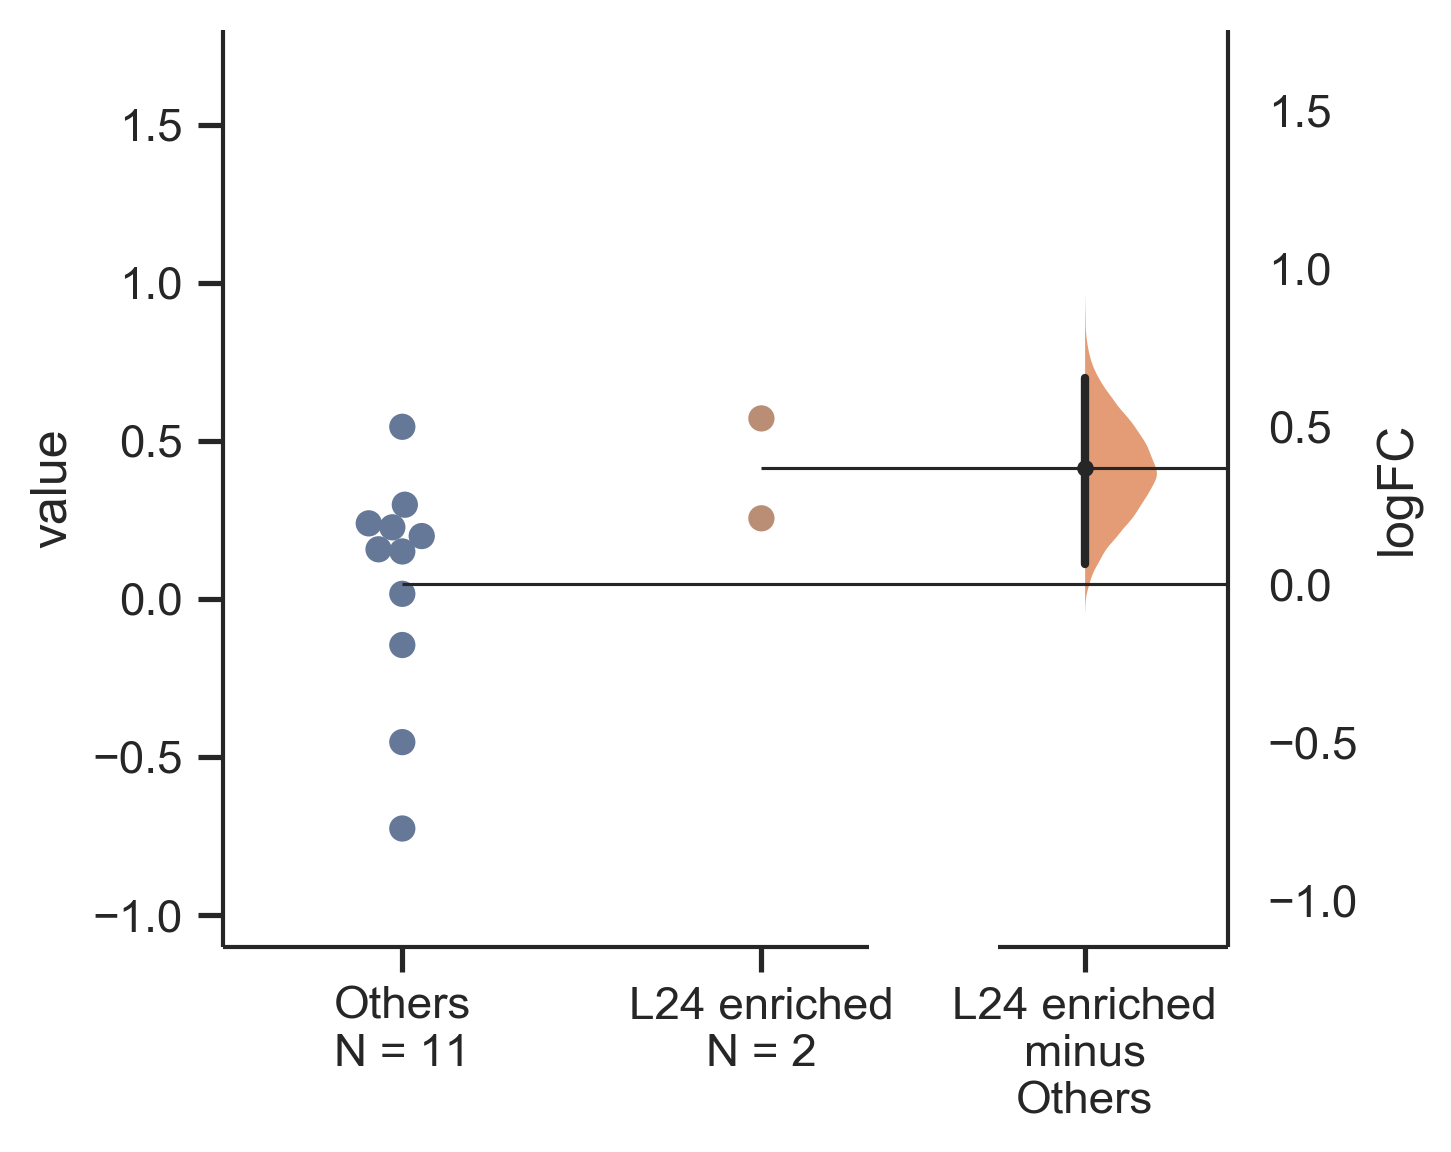

In [65]:
import dabest
data = {'Others':notTopTE['log2FoldChange'],'L24 enriched':topTE['log2FoldChange'],}
#data = {'L24 enriched':topTE['log2FoldChange'],'Others':notTopTE['log2FoldChange'],}
df = pd.DataFrame(data)
df_dabest = dabest.load(data = df,idx=("Others","L24 enriched"),paired=False,resamples=10000)
plt=df_dabest.mean_diff.plot(swarmplot_kwargs={"size":6.3},swarm_ylim=(-1.1, 1.8),contrast_label="logFC",dpi=300,es_marker_size=3);
plt.savefig('T1 ER on TE t2t1/L24 t0 enriched genes on TE estimation stats pval 0.202.png',dpi=300)

In [33]:
from scipy.stats import ttest_ind

ttest_ind(topTE['log2FoldChange'],notTopTE['log2FoldChange'])

Ttest_indResult(statistic=11.383454573166286, pvalue=1.176548476497311e-28)

In [31]:
S15_total_df = pd.read_csv('csv_raw/ER_S15_t0.csv')
S15_total_filtered = S15_total_df[S15_total_df['padj'] < 0.05]
S15_total_filtered = S15_total_filtered.sort_values(by=['log2FoldChange'])
geneNum=sum((S15_total_filtered['log2FoldChange']>1)*1)
topGenes = S15_total_filtered['Unnamed: 0'].tail(geneNum)
botGenes = S15_total_filtered['Unnamed: 0'].head(geneNum)
notTopGenes = S15_total_filtered['Unnamed: 0'].head(len(S15_total_filtered)-geneNum)
topTE = TE_1_0[TE_1_0['Unnamed: 0'].isin(topGenes)]
botTE = TE_1_0[TE_1_0['Unnamed: 0'].isin(botGenes)]
notTopTE = TE_1_0[TE_1_0['Unnamed: 0'].isin(notTopGenes)]

In [32]:
geneNum

110

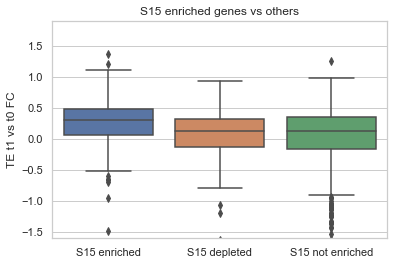

In [50]:
import matplotlib.pyplot as plt

data = {'S15 enriched':topTE['log2FoldChange'], 'S15 depleted':botTE['log2FoldChange'], 'S15 not enriched':notTopTE['log2FoldChange']}
df =  pd.DataFrame(data) 
sns.set(style="whitegrid")
ax=sns.boxplot(data=df)
plt.ylabel('TE t1 vs t0 FC')
plt.title('S15 enriched genes vs others')
axes = plt.gca()
axes.set_ylim([-1.6,1.9])
plt.savefig('T1 ER on TE t2t1/S15 t0 enriched genes on TE boxplot.png',dpi=300)

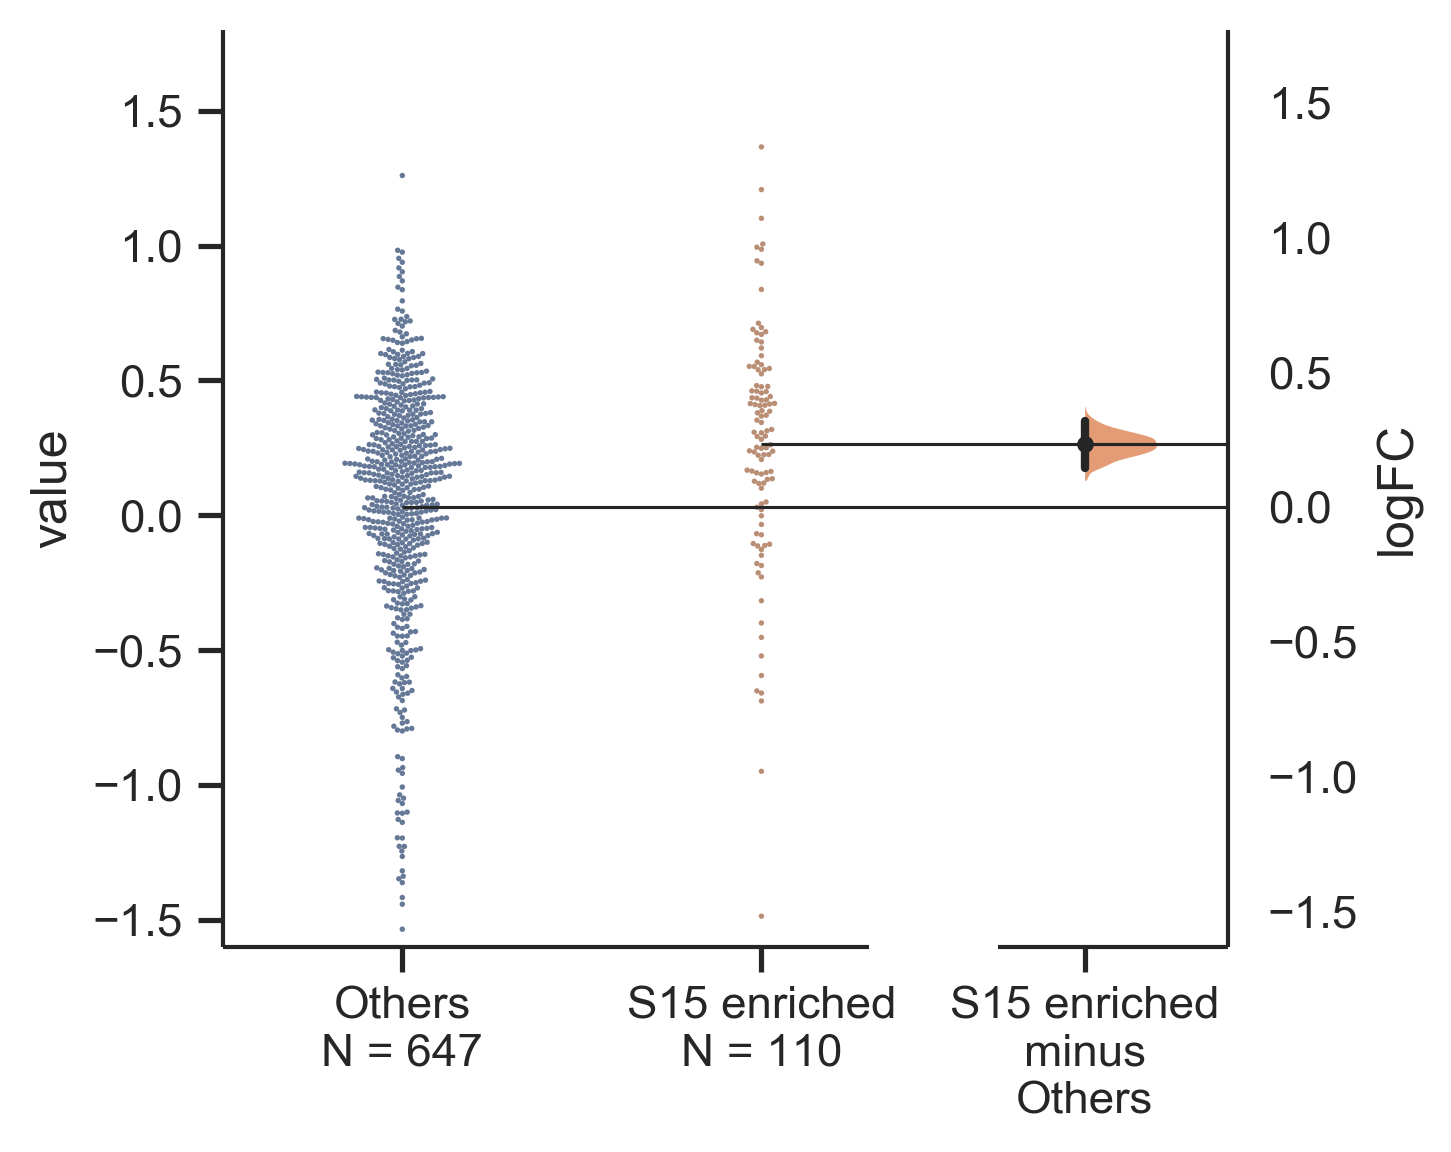

In [48]:
import dabest
data = {'Others':notTopTE['log2FoldChange'],'S15 enriched':topTE['log2FoldChange'],}
df = pd.DataFrame(data)
df_dabest = dabest.load(data = df,idx=("Others","S15 enriched"),paired=False,resamples=1000)
plt=df_dabest.mean_diff.plot(swarmplot_kwargs={"size":1.3},swarm_ylim=(-1.6, 1.8),contrast_label="logFC",dpi=300,es_marker_size=3);
# axes = plt.gca()
# axes.set_ylim([-1.5,1.5])
plt.savefig('T1 ER on TE t2t1/S15 t0 enriched genes on TE estimation stats pval 0.00000365.png',dpi=300)

In [116]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

ttest_ind(topTE['log2FoldChange'],botTE['log2FoldChange'])

Ttest_indResult(statistic=28.527553006801895, pvalue=5.066528703349977e-43)

In [39]:
format(ttest_1samp(topTE['log2FoldChange'],notTopTE['log2FoldChange'])[1], '.8f')

'0.00000365'

In [12]:
botTE['log2FoldChange']

2019    0.157012
6276    0.298098
Name: log2FoldChange, dtype: float64

In [122]:
L24_total_df = pd.read_csv('csv_raw/ER_L24_t1.csv')
L24_total_filtered = L24_total_df[L24_total_df['padj'] < 0.05]
L24_total_filtered = L24_total_filtered.sort_values(by=['log2FoldChange'])
topNum=sum((L24_total_filtered['log2FoldChange']>1)*1)
L24topGenes = L24_total_filtered['Unnamed: 0'].tail(topNum)
topNum

40

In [123]:
S15_total_df = pd.read_csv('csv_raw/ER_S15_t1.csv')
S15_total_filtered = S15_total_df[S15_total_df['padj'] < 0.05]
S15_total_filtered = S15_total_filtered.sort_values(by=['log2FoldChange'])
topNum=sum((S15_total_filtered['log2FoldChange']>1)*1)
S15topGenes = S15_total_filtered['Unnamed: 0'].tail(topNum)
topNum

189

In [133]:
idx = L24topGenes.isin(S15topGenes)
L24unique = L24topGenes[~idx]
both = L24topGenes[idx]
idx = S15topGenes.isin(L24topGenes)
S15unique = S15topGenes[~idx]
len(S15unique)

169

In [134]:
TE_2_1 = pd.read_csv('csv_raw/TE_t2_t1.csv')
L24TE = TE_2_1[TE_2_1['Unnamed: 0'].isin(L24unique)]
bothTE = TE_2_1[TE_2_1['Unnamed: 0'].isin(both)]
S15TE = TE_2_1[TE_2_1['Unnamed: 0'].isin(S15unique)]


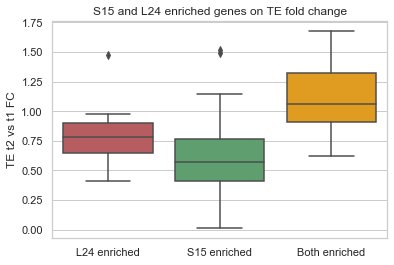

In [145]:
import matplotlib.pyplot as plt

data = {'L24 enriched':L24TE['log2FoldChange'], 'S15 enriched':S15TE['log2FoldChange'], 'Both enriched':bothTE['log2FoldChange']}
df =  pd.DataFrame(data) 
sns.set(style="whitegrid")
my_pal = {"L24 enriched": "r", "S15 enriched": "g", "Both enriched":"orange"}
ax=sns.boxplot(data=df, palette=my_pal)
plt.ylabel('TE t2 vs t1 FC')
plt.title('S15 and L24 enriched genes on TE fold change')
axes = plt.gca()
#axes.set_ylim([-1.6,1.9])
plt.savefig('T1 ER on TE t2t1/S15 and L24 enriched genes on TE fold change.png',dpi=300)

In [139]:
from scipy.stats import ttest_ind

ttest_ind(L24TE['log2FoldChange'],bothTE['log2FoldChange'])

Ttest_indResult(statistic=-4.1769798291532005, pvalue=0.0001664488110549895)

In [140]:
from scipy.stats import ttest_ind

ttest_ind(L24TE['log2FoldChange'],S15TE['log2FoldChange'])

Ttest_indResult(statistic=3.0852675998084753, pvalue=0.002342338597723634)

In [141]:
from scipy.stats import ttest_ind

ttest_ind(S15TE['log2FoldChange'],bothTE['log2FoldChange'])

Ttest_indResult(statistic=-8.064949295312276, pvalue=8.559446381065832e-14)